In [1]:
import os
from io import open 

"""Writing the data per file into a dictionary for which the key is the category of news"""

import unicodedata
import string

all_letters = string.ascii_letters + ".,;'& "
n_letters = len(all_letters)

def unitoAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

def readFile_byline(filename):
    line_of_news = open("news_data_final/"+filename , encoding = 'utf-8').read().split('\n')    
    return [unitoAscii(line) for line in line_of_news]

In [2]:
category_news = {}
all_categories = []

list_of_files = os.listdir("news_data_final/")

#Dictionary which maps every category of news to it's description
for _file in list_of_files:
    category = _file.split(".")[0]
    all_categories.append(category)
    news_descp = readFile_byline(_file)
    category_news[category] = news_descp

num_categories = len(all_categories)
print(num_categories)

count_of_news_category = {}
average_words_per_number_of_samples = []

#Counting news items per category of news 
for key in category_news.keys():
    item = category_news.get(key)
    number_of_news_items = len(item)
    count_of_news_category[key] = number_of_news_items
    count_of_words = 0
    for sentence in item:
        count_of_words += len(sentence.split(" "))
    average_words_per_number_of_samples.append(count_of_words/number_of_news_items)

#print(count_of_news_category["WELLNESS"])
#print(category_news["CRIME"][0:2])
#print(average_words_per_number_of_samples)

29


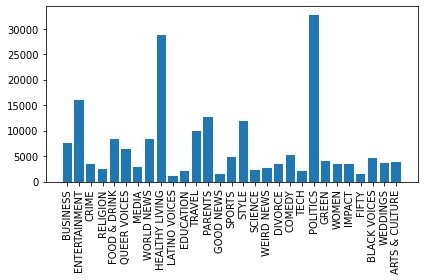

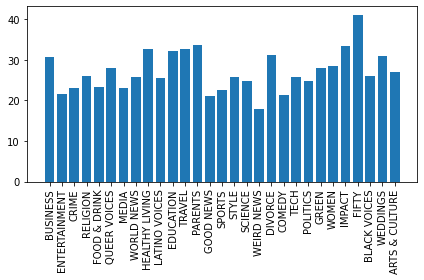

In [3]:
import random
import matplotlib
import matplotlib.pyplot as plt 

fig = plt.figure()
category = count_of_news_category.keys()
value = count_of_news_category.values()
plt.bar(category, value)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Number_of_articles_per_category.png')
plt.show()

fig1 = plt.figure()
category = count_of_news_category.keys()
value = average_words_per_number_of_samples
plt.bar(category, value)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Words_per_category.png')
plt.show()


In [5]:
import torch
import torch.nn as nn 
from torch import optim
import torch.nn.functional as F 

device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")
print(device)

def findIndexOfWordInSentence(sentence):
    indexOfWord = {}
    for index, word in enumerate(sentence):
        indexOfWord[word] = index
    return list(indexOfWord.values())

def sentenceToTensor(sentence):
    indexes = findIndexOfWordInSentence(sentence)
    return torch.tensor(indexes , dtype = torch.long, device = device).view(-1, 1)

category_plus_news_list = []

from nltk.corpus import stopwords

for key in category_news.keys():
    for news_item in category_news[key]:
        #news_item = [word for word in news_item.split(" ") if word not in stopwords.words('english')]
        #news_item = " ".join(word for word in news_item)
        category_plus_news_list.append((key, news_item))

print(category_plus_news_list[0])

def pairedTensor(pair):
    #pair is element in category_plus_news_list
    input_tensor = sentenceToTensor(pair[1])
    output_tensor = sentenceToTensor(pair[0])
    return (input_tensor, output_tensor)

#print(pairedTensor(category_plus_news_list[100]))

unique_words = []

'''for pair in category_plus_news_list:
    for word in pair[1].split(" "):
        if word.lower() not in unique_words:
            unique_words.append(word.lower())

print(unique_words[0:50])'''

cuda:2
('BUSINESS', 'U.S. Launches Auto Import Probe, China Vows To Defend Its Interests. The investigation could lead to new U.S. tariffs similar to those imposed on imported steel and aluminum in March.')


'for pair in category_plus_news_list:\n    for word in pair[1].split(" "):\n        if word.lower() not in unique_words:\n            unique_words.append(word.lower())\n\nprint(unique_words[0:50])'

In [6]:
list_of_sentences_business = []
list_of_sentences_politics = []
list_of_sentences_religion = []
list_of_sentences_food = []
list_of_sentences_home = []

list_of_sentences = []

labels =[]
count_of_lables=[]

for pair in category_plus_news_list:
    label = pair[0]
    sentences = pair[1].split(". ")
    for sentence in sentences:
        if len(sentence.split(" ")) >= 5:
            list_of_sentences.append(sentence)
            labels.append(label)
            
    
#print(list_of_sentences[0:20])
print(len(list_of_sentences))
#print((labels[0:20]))



399242


In [167]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer("paraphrase-distilroberta-base-v1", device = "cuda:2")
embeddings = model.encode(list_of_sentences)
#print(category_plus_news_list[0][1])
print(embeddings.shape)


(399242, 768)


In [168]:
# Normalalise the input vectors v = (v - mean) / std

#embeddings -= embeddings.mean(0)
#embeddings /= embeddings.std(0)

In [169]:
def letterToIndex(letter):
    return all_letters.find(letter)


def wordToTensor(word):
    tensor = torch.zeros(len(word), 1, n_letters)
    for li, letter in enumerate(word):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

In [170]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

sentences = list(category_news.keys())

def to_matrix(l, n):
    return [l[i:i+n] for i in range(0, len(l), n)]

corpus = to_matrix(sentences, 1)
#print(corpus)

model = Word2Vec(sentences=corpus, size=300, window=5, min_count=1, workers=4)
model.save("word2vec.model")

vector = model.wv['ARTS & CULTURE']
#print(vector)

In [171]:
label_list = list(category_news.keys())
index_class_map_dict={}

for idx, value in enumerate(label_list):
    index_class_map_dict[value]=idx

print(index_class_map_dict)

{'BUSINESS': 0, 'ENTERTAINMENT': 1, 'CRIME': 2, 'RELIGION': 3, 'FOOD & DRINK': 4, 'QUEER VOICES': 5, 'MEDIA': 6, 'WORLD NEWS': 7, 'HEALTHY LIVING': 8, 'LATINO VOICES': 9, 'EDUCATION': 10, 'TRAVEL': 11, 'PARENTS': 12, 'GOOD NEWS': 13, 'SPORTS': 14, 'STYLE': 15, 'SCIENCE': 16, 'WEIRD NEWS': 17, 'DIVORCE': 18, 'COMEDY': 19, 'TECH': 20, 'POLITICS': 21, 'GREEN': 22, 'WOMEN': 23, 'IMPACT': 24, 'FIFTY': 25, 'BLACK VOICES': 26, 'WEDDINGS': 27, 'ARTS & CULTURE': 28}


In [172]:
embedded_sentences = []

for index, embedding in enumerate(embeddings):
    input_vector = embedding
    target_vector = labels[index]
    target_class = index_class_map_dict[target_vector]
    #target_vector = model.wv[labels[index]]
    embedded_sentences.append((input_vector, target_class))

    
#print(embedded_sentences[0][1])

In [173]:
'''label_list = list(category_news.keys())

for label in labels:
    for idx, value in enumerate(label_list):
        if label == value:
            labels[labels.index(label)] = idx'''
            


'label_list = list(category_news.keys())\n\nfor label in labels:\n    for idx, value in enumerate(label_list):\n        if label == value:\n            labels[labels.index(label)] = idx'

In [174]:
label_list = list(category_news.keys())
index_class_map=[]

for idx, value in enumerate(label_list):
    index_class_map.append((idx,value))

print(index_class_map)
    
    

[(0, 'BUSINESS'), (1, 'ENTERTAINMENT'), (2, 'CRIME'), (3, 'RELIGION'), (4, 'FOOD & DRINK'), (5, 'QUEER VOICES'), (6, 'MEDIA'), (7, 'WORLD NEWS'), (8, 'HEALTHY LIVING'), (9, 'LATINO VOICES'), (10, 'EDUCATION'), (11, 'TRAVEL'), (12, 'PARENTS'), (13, 'GOOD NEWS'), (14, 'SPORTS'), (15, 'STYLE'), (16, 'SCIENCE'), (17, 'WEIRD NEWS'), (18, 'DIVORCE'), (19, 'COMEDY'), (20, 'TECH'), (21, 'POLITICS'), (22, 'GREEN'), (23, 'WOMEN'), (24, 'IMPACT'), (25, 'FIFTY'), (26, 'BLACK VOICES'), (27, 'WEDDINGS'), (28, 'ARTS & CULTURE')]


In [175]:
label_list = list(category_news.keys())
index_class_map=[]

for idx, value in enumerate(label_list):
    index_class_map.append((idx,value))

print(index_class_map)


label_list = list(category_news.keys())
index_class_map_dict={}

for idx, value in enumerate(label_list):
    index_class_map_dict[idx]=value

print(index_class_map_dict.keys())

    

[(0, 'BUSINESS'), (1, 'ENTERTAINMENT'), (2, 'CRIME'), (3, 'RELIGION'), (4, 'FOOD & DRINK'), (5, 'QUEER VOICES'), (6, 'MEDIA'), (7, 'WORLD NEWS'), (8, 'HEALTHY LIVING'), (9, 'LATINO VOICES'), (10, 'EDUCATION'), (11, 'TRAVEL'), (12, 'PARENTS'), (13, 'GOOD NEWS'), (14, 'SPORTS'), (15, 'STYLE'), (16, 'SCIENCE'), (17, 'WEIRD NEWS'), (18, 'DIVORCE'), (19, 'COMEDY'), (20, 'TECH'), (21, 'POLITICS'), (22, 'GREEN'), (23, 'WOMEN'), (24, 'IMPACT'), (25, 'FIFTY'), (26, 'BLACK VOICES'), (27, 'WEDDINGS'), (28, 'ARTS & CULTURE')]
dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])


In [176]:
def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

In [201]:
import torch
torch.manual_seed(0)

import numpy as np
np.random.seed(0)

import random
random.seed(0)

In [202]:
import math 
class SNNLinear(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.fc = nn.Linear(input_size, output_size)
        nn.init.normal_(self.fc.weight, std = math.sqrt(1/input_size))
        
    def forward(self, inputs):
        return self.fc(inputs)
    

In [203]:
 
device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")
class NN(nn.Module):
    """ Simple NN architecture with 3 fully connected layers
        and SeLU activation """
    
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        fc1 = SNNLinear(input_size, hidden_size)
        fc2 = SNNLinear(hidden_size, hidden_size//2)
        fc3 = SNNLinear(hidden_size//2, output_size)
        self.net = nn.Sequential(fc1, nn.SELU(), nn.AlphaDropout(0.2), fc2, nn.SELU(), nn.AlphaDropout(0.2), fc3) 
                                
        
    def forward(self, input):
        return self.net(input)

    
print(device)

cuda:2


In [204]:
def train(input_tensor, target_tensor, model, model_optimizer, criterion):
    model.train()
    
    model_optimizer.zero_grad()

    input_length = input_tensor.shape
    target_length = target_tensor.shape
    
    output = model(input_tensor)
        
    loss = criterion(output, target_tensor)
    loss.backward()
    
    model_optimizer.step()
    
    return output, loss.item()

In [205]:
def _eval(input_tensor, target_tensor, model, model_optimizer, criterion):
    model.eval()
    
    with torch.no_grad():

        input_length = input_tensor.shape
        target_length = target_tensor.shape
        output = model(input_tensor)

        loss = criterion(output, target_tensor)

    return output, loss.item()

In [206]:
import time
import math


def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)


def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return '%s (- %s)' % (asMinutes(s), asMinutes(rs))

In [207]:
num_of_items_per_class = [16190, 28174, 6225, 4639, 15121, 12507, 5055, 16220, 63001, 2184, 4475, 21371, 29184, 2362, 8805, 22697, 4004, 4455, 7192, 8959, 4197, 62419, 7674, 7391, 7408, 3792, 8854, 7535, 7152]

weights = []
for i in num_of_items_per_class:
    weights.append(1/i)
#print(len(weights))

class_weights = torch.FloatTensor(weights).to(device)

In [208]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, list_of_data):
        self.list_of_data = list_of_data

    # get one sample
    def __getitem__(self, idx):
        
        sample = self.list_of_data[idx]
        input_tensor = torch.from_numpy(sample[0]).float()
        target_tensor = torch.tensor(sample[1])
    
        return input_tensor, target_tensor

    def __len__(self):
        return len(self.list_of_data)
    
dataset = Dataset(embedded_sentences)

_input, _target = dataset.__getitem__(0)
print(_input.shape, _target.shape)


val_size = 0.1
test_size = 0.1

test_amount, val_amount = int(dataset.__len__() * test_size), int(dataset.__len__() * val_size)
print(test_amount, val_amount)

train_set, val_set, test_set = torch.utils.data.random_split(dataset, [
            (dataset.__len__() - (test_amount + val_amount)), 
            test_amount, 
            val_amount
])


train_dataloader = torch.utils.data.DataLoader(
            train_set,
            batch_size=128,
            shuffle=True,
)
val_dataloader = torch.utils.data.DataLoader(
            val_set,
            batch_size=128,
            shuffle=False,
)
test_dataloader = torch.utils.data.DataLoader(
            test_set,
            batch_size=128,
            shuffle=False,
)


torch.Size([768]) torch.Size([])
39924 39924


In [209]:
'''def trainIters(model, n_iters, embedded, val_embedded, print_every, plot_every=100, learning_rate=learning_rate):
    start = time.time()
    plot_losses = []
    print_loss_total = 0  # Reset every print_every
    plot_loss_total = 0  # Reset every plot_every

    #TODO: Try ADAM
    model_optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    #training_pairs = [randomChoice(embedded) for i in range(n_iters)]
    
    criterion = nn.CrossEntropyLoss(weight = class_weights)
    
    total_steps = n_iters*len(embedded)
    
    iterator = (item for _ in range(n_iters) for item in embedded)
    
    with tqdm(total = total_steps) as progressbar:
        
        for global_step, (_input, _target) in enumerate(iterator, 1):

            input_tensor = _input.to(device)
            target_tensor = _target.to(device)

            #print(input_tensor.shape)
            #print(target_tensor.shape)


            loss = train(input_tensor, target_tensor, model,
                     model_optimizer, criterion)[1]

            print_loss_total += loss
            plot_loss_total += loss

            #global_step = (_iter) * len(embedded) + i


            if global_step % print_every == 0:
                print_loss_avg = print_loss_total / print_every
                print_loss_total = 0
                progressbar.set_postfix({"loss":print_loss_avg})
                print('%s (%d %d%%) %.4f' % (timeSince(start, global_step / total_steps),
                                             global_step, global_step / total_steps * 100, print_loss_avg))

            if global_step % plot_every == 0:
                plot_loss_avg = plot_loss_total / plot_every
                writer.add_scalar('training loss',
                            plot_loss_avg)
                plot_losses.append(plot_loss_avg)
                plot_loss_total = 0

            progressbar.update()
    showPlot(plot_losses)'''

'def trainIters(model, n_iters, embedded, val_embedded, print_every, plot_every=100, learning_rate=learning_rate):\n    start = time.time()\n    plot_losses = []\n    print_loss_total = 0  # Reset every print_every\n    plot_loss_total = 0  # Reset every plot_every\n\n    #TODO: Try ADAM\n    model_optimizer = optim.Adam(model.parameters(), lr=learning_rate)\n    #training_pairs = [randomChoice(embedded) for i in range(n_iters)]\n    \n    criterion = nn.CrossEntropyLoss(weight = class_weights)\n    \n    total_steps = n_iters*len(embedded)\n    \n    iterator = (item for _ in range(n_iters) for item in embedded)\n    \n    with tqdm(total = total_steps) as progressbar:\n        \n        for global_step, (_input, _target) in enumerate(iterator, 1):\n\n            input_tensor = _input.to(device)\n            target_tensor = _target.to(device)\n\n            #print(input_tensor.shape)\n            #print(target_tensor.shape)\n\n\n            loss = train(input_tensor, target_tensor, mo

In [210]:
from torch.optim.lr_scheduler import *

learning_rate = 1e-4
def trainIters(model, n_iters, embedded, val_embedded, print_every, learning_rate=learning_rate):
    start = time.time()
    plot_losses_train = []
    plot_losses_val =[]
    print_loss_total_train = 0  # Reset every print_every
    plot_loss_total_train = 0  # Reset every plot_every
    
    print_loss_total_val = 0  # Reset every print_every
    plot_loss_total_val = 0  # Reset every plot_every
    
    print_acc_total_train = 0
    plot_acc_total_train = 0
    plot_acc_train = []
    
    print_acc_total_val = 0
    plot_acc_total_val = 0
    plot_acc_val = []
    
    train_epochs = []
    val_epochs = []

    #TODO: Try ADAM
    model_optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay = 1e-5)
    
    #TODO: Learning rate scheduler
    scheduler = StepLR(model_optimizer, step_size=50, gamma=0.1)
    
    criterion = nn.CrossEntropyLoss()
    
    total_steps = n_iters*len(embedded)
    
    for epoch in range(n_iters):
                
        for local_step, (_input, _target) in enumerate(embedded, 1):

            input_tensor = _input.to(device)
            noise = torch.randn_like(input_tensor) * 1e-5 
            input_tensor = input_tensor + noise
            target_tensor = _target.to(device)

            output, loss = train(input_tensor, target_tensor, model,
             model_optimizer, criterion)
            
            accuracy = (output.argmax(-1) == target_tensor).float().mean()

            print_loss_total_train += loss
            plot_loss_total_train += loss
            print_acc_total_train += accuracy
            plot_acc_total_train += accuracy
            

            global_step = epoch * len(embedded) + local_step

            if global_step % print_every == 0:
                print_loss_avg_train = print_loss_total_train / print_every
                print_loss_total_train = 0
        
                print('%s (%d %d%%) train_loss = %.4f' % (timeSince(start, global_step / total_steps),
                                             global_step, global_step / total_steps * 100, print_loss_avg_train))

    
        plot_loss_avg_train = plot_loss_total_train / len(embedded)
        plot_losses_train.append(plot_loss_avg_train)
        
        plot_avg_acc_train = plot_acc_total_train / len(embedded)
        plot_acc_train.append(plot_avg_acc_train)
        
        plot_loss_total_train = 0
        plot_acc_total_train = 0
        
        train_epochs.append(epoch)


        if epoch % 5 == 0:


            for (_input, _target) in val_embedded:

                input_tensor = _input.to(device)
                target_tensor = _target.to(device)

                output, loss = _eval(input_tensor, target_tensor, model,
                             model_optimizer, criterion)

                accuracy = (output.argmax(-1) == target_tensor).float().mean()

                print_loss_total_val += loss
                plot_loss_total_val += loss
                print_acc_total_val += accuracy
                plot_acc_total_val += accuracy


            print_loss_avg_val = print_loss_total_val / len(val_embedded)
            print_loss_total_val = 0
            
            print_avg_acc = print_acc_total_val/ len(val_embedded)
            print_acc_total_val = 0
           
            print('val_loss = %.4f acc = %.4f' % (print_loss_avg_val, print_avg_acc))

            plot_loss_avg_val = plot_loss_total_val / len(val_embedded)
            plot_avg_acc_val = plot_acc_total_val / len(val_embedded)
            
            
            
            plot_losses_val.append(plot_loss_avg_val)
            plot_acc_val.append(plot_avg_acc_val)
            
            plot_loss_total_val = 0
            plot_acc_total_val = 0
            val_epochs.append(epoch)
       
        scheduler.step()
        

    #print(train_epochs)
    #print(val_epochs)
    
    import matplotlib.pyplot as plt
    plt.switch_backend('agg')
    import matplotlib.ticker as ticker
    import numpy as np


    plt.figure(figsize=(10,10))
    plt.plot(train_epochs, plot_losses_train, linewidth=5)
    plt.plot(val_epochs, plot_losses_val, linewidth=5)
    plt.legend(['train loss', 'val loss'], loc = 'upper right')
    plt.savefig('loss-sbert.png')
    plt.show()

    plt.figure(figsize=(10,10))
    plt.plot(val_epochs, plot_acc_val, linewidth =5)
    plt.legend(['val_acc'], loc = 'upper right')
    plt.savefig('acc-sbert.png')
    plt.show()

In [211]:
hidden_size = 128
input_size = embeddings.shape[1]
output_size = 29

model = NN(input_size, hidden_size, output_size).to(device)
learning_rate = 1e-4
#Note : may need more epochs range [100-300]
epochs = 100


val_loss = 2.0755 acc = 0.4931
0m 24s (- 19m 48s) (5000 2%) train_loss = 2.1892
0m 47s (- 19m 3s) (10000 4%) train_loss = 1.8644
val_loss = 1.8348 acc = 0.5426
1m 11s (- 18m 44s) (15000 6%) train_loss = 1.7999
1m 35s (- 18m 15s) (20000 8%) train_loss = 1.7678
1m 58s (- 17m 48s) (25000 10%) train_loss = 1.7434
val_loss = 1.8065 acc = 0.5505
2m 22s (- 17m 23s) (30000 12%) train_loss = 1.7272
2m 46s (- 16m 59s) (35000 14%) train_loss = 1.7136
val_loss = 1.7879 acc = 0.5545
3m 10s (- 16m 38s) (40000 16%) train_loss = 1.7014
3m 34s (- 16m 15s) (45000 18%) train_loss = 1.6933
3m 57s (- 15m 49s) (50000 20%) train_loss = 1.6845
val_loss = 1.7665 acc = 0.5583
4m 22s (- 15m 28s) (55000 22%) train_loss = 1.6754
4m 46s (- 15m 4s) (60000 24%) train_loss = 1.6695
val_loss = 1.7602 acc = 0.5592
5m 11s (- 14m 43s) (65000 26%) train_loss = 1.6631
5m 35s (- 14m 20s) (70000 28%) train_loss = 1.6578
5m 59s (- 13m 56s) (75000 30%) train_loss = 1.6518
val_loss = 1.7555 acc = 0.5613
6m 23s (- 13m 32s) (80000

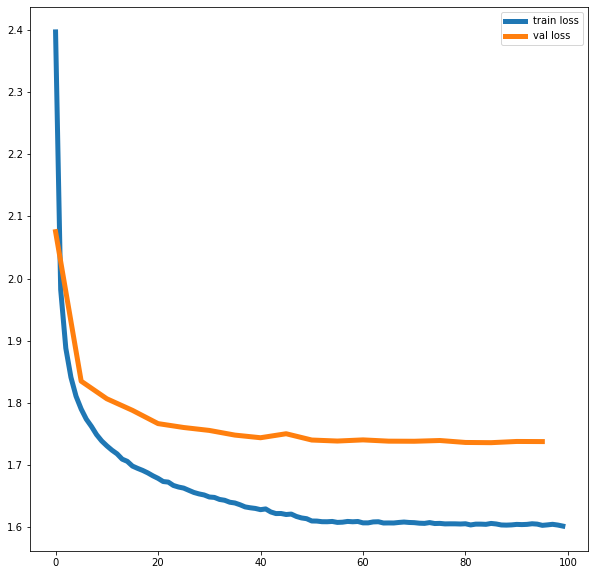

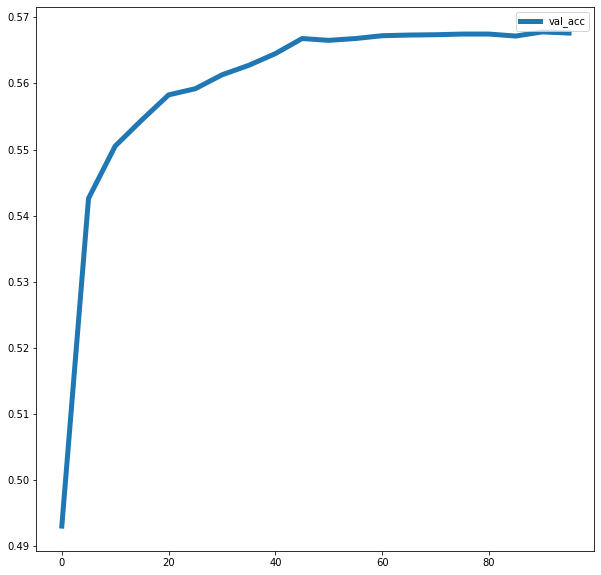

In [212]:
from tqdm.notebook import tqdm
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter('runs/experiment1')

trainIters(model, epochs, train_dataloader, val_dataloader, print_every=5000, learning_rate = learning_rate)